In [9]:
from gensim.models import Word2Vec, FastText

from word_vectorizer import WordVectorizer

In [10]:
vectorizer = WordVectorizer(pretrained=False)

In [11]:
vectorizer.load_data(size_mb=1000)

Dataset in ./data/raw_cat_gc_1000mb.pkl already exists.


In [12]:
vectorizer.tokenize(tokenizer='nltk', batch_size=500, caps=True)

Tokenized texts in file ./data/nltk_caps_cat_gc_1000mb.pkl already exist.


In [13]:
vectorizer.train(vectorizer='word2vec', model_type='skipgram', vector_size=100, window=10, min_count=5, workers=16, save=True)

Loading tokenized texts from ./data/nltk_caps_cat_gc_1000mb.pkl...
Training word2vec model with skipgram...


In [19]:
vectorizer.wv.most_similar('Parlament', topn=10)

[('Senat', 0.8115037083625793),
 ('reprovi', 0.7707695364952087),
 ('diputat', 0.7649011015892029),
 ('parlamentari', 0.7601525187492371),
 ('Congrés', 0.7572910785675049),
 ("l'eurocambra", 0.7527143955230713),
 ('parlament', 0.7516252994537354),
 ("l'Eurocambra", 0.7512456178665161),
 ('Sassoli', 0.7499904632568359),
 ('parlamentària', 0.7481720447540283)]

In [15]:
# Evaluate the model
eval_path = './data/wordsim353.en.ca.txt' if not vectorizer.caps else './data/wordsim353.en.ca_caps.txt'
vectorizer.wv.evaluate_word_pairs(eval_path, encoding='utf-8')

(PearsonRResult(statistic=0.5130876091476385, pvalue=4.181198558685359e-16),
 SignificanceResult(statistic=0.5319544391480784, pvalue=2.127569151502918e-17),
 0.904977375565611)

e:\Development\VSCODE\University\PLH\word-embeddings\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


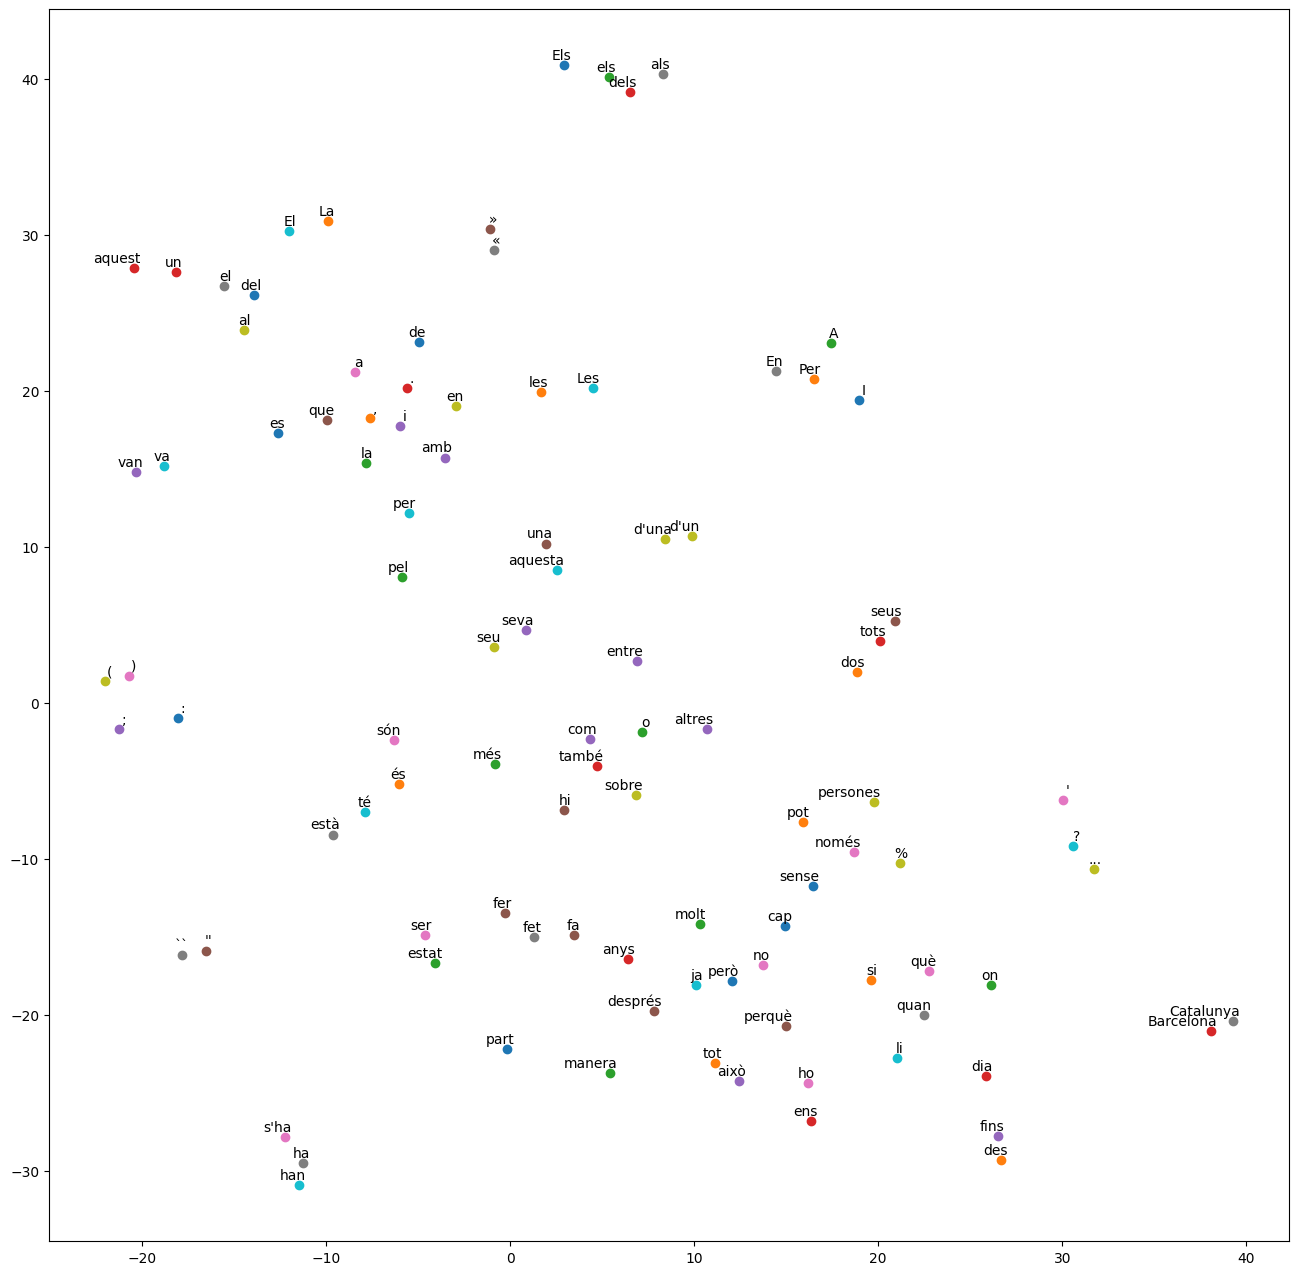

In [16]:
vectorizer.tsne(num_words=100)